# Soal Dataset

## Kelompok Tiga Serangkai

In [19]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_excel('jakartacovid19.xlsx', engine='openpyxl')

# Removing unecessary columns
cols = [
    "Unnamed: 17",
    "Unnamed: 18",
    "Unnamed: 19",
    "Unnamed: 20",
    "Unnamed: 21",
    "Unnamed: 22",
    "Unnamed: 23",
    "Unnamed: 24",
    "Unnamed: 25",
    "Unnamed: 26",
    "Unnamed: 27",
    "Unnamed: 28",
]
data.drop(cols, inplace=True, axis=1)


In [21]:
posharian = data['Positif Harian']

### 1. Tentukan mean, median, modus dari positif COVID-19 harian Jakarta.

In [22]:
# Mean
print(posharian.mean())

# Median
print(posharian.median())

# Modus
print(posharian.mode())

1401.0179640718563
888.0
0    0
dtype: int64


### 2. Temukan nilai minimal dan maksimal dari positif COVID-19 harian Jakarta.

In [23]:
# Maximum
print(posharian.max())

# Minimum
print(posharian.min())

14619
0


### 3. Find outliers

In [24]:
# Choose relevant columns
outlier_cols = [
    'Total Pasien',
    'Sembuh',
    'Meninggal',
    'Self Isolation',
    'Masih Perawatan',
    'Belum Diketahui (masih verifikasi)',
    'Menunggu Hasil',
    'Tenaga Kesehatan Terinfeksi',
    'Positif Harian',
    'Positif Aktif',
    'Sembuh Harian',
    'Tanpa Gejala',
    'Bergejala',
    'Belum Ada Data'
]

# Finding the outlier
for col in outlier_cols:
    q1 = np.quantile(data[col],0.25)
    q3 = np.quantile(data[col],0.75)
    med = np.median(data[col])
    iqr = q3 - q1
    
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q3- (1.5*iqr) 
    
    outlier = data[col][(data[col] <= lower_bound) | (data[col] >= upper_bound)]
    
    print("Kolom {} memiliki {} outlier(s):\n{}\n\n".format(col,len(outlier),outlier.values))

Kolom Total Pasien memiliki 0 outlier(s):
[]


Kolom Sembuh memiliki 0 outlier(s):
[]


Kolom Meninggal memiliki 0 outlier(s):
[]


Kolom Self Isolation memiliki 58 outlier(s):
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     7 18657 19554 19869 19432 18528 18473 19381 20539
 19272 19824 18925 21863 20419 21191 19325 17958 18174 19105 20717 21167
 22868 26403 29325 33829 38464 42252 45504 47829 49836 53014 54941 59307
 62873 65448 69644 72361 73239 71812 68251 66581 71848 78571]


Kolom Masih Perawatan memiliki 74 outlier(s):
[    0     0     2     2     4     4     4     4    31    31    33    57
    65    70    84    78    83    91   121   125   157   177   225   260
   290   324   346   364   435   449   451   499   565   584   495   405
   417   451   476   495   554   597  8540  9888  9374  8756  9284  9560
 10325 11037 11343 11024 12837 14234 15606 17605 18831 19874 20419 22210
 24184 25380 27442 27687 28290 29136 30418 29721 26903 2

### 4. Find coorelation

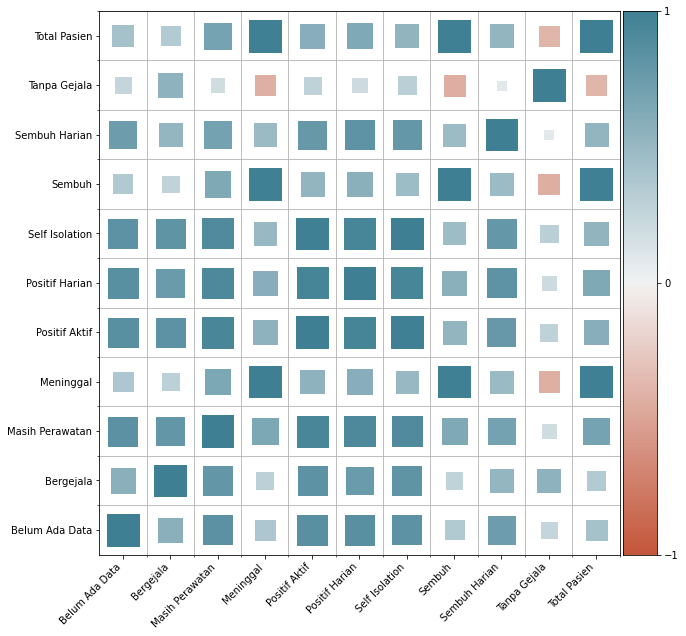

In [25]:
# Step 1 - Make a scatter plot with square markers, set column names as labels
def heatmap(x, y, size, color):
    fig, ax = plt.subplots(figsize=(10,10))
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    
    
    n_colors = 256 # Use 256 colors for the diverging color palette
    palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
    color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation
    
    def value_to_color(val):	
        val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range	
        ind = int(val_position * (n_colors - 1)) # target index in the color palette	
        return palette[ind]
    
    
    
    size_scale = 1000
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        c=color.apply(value_to_color), # Vector of square colors, mapped to color palette	
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    
    
    
    ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

    col_x = [0]*len(palette) # Fixed x coordinate for the bars
    bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

    bar_height = bar_y[1] - bar_y[0]
    ax.barh(
        y=bar_y,
        width=[5]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )
    ax.set_xlim(1,2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.set_ylim(0,1)
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right() # Show vertical ticks on the right 
    
    
data = data
columns = [
    'Total Pasien',
     'Sembuh',
     'Meninggal',
     'Self Isolation',
     'Masih Perawatan',
     'Positif Harian',
     'Positif Aktif',
     'Sembuh Harian',
     'Tanpa Gejala',
     'Bergejala',
     'Belum Ada Data'
    
] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    color=corr['value']
)